 # <font color=darkblue>Programming for Data Analysis 2022 - Project 2</font>

## <font color=darkblue>Orla Corry</font>
***

## <font color=darkblue>Table of Contents</font>
***

- [Introduction](#Introduction)


- [Importing Libraries](#Importing-Libraries)


- [Reading in the csv file](#Reading-in-the-csv-file)


- [Analysis/review of the dataset](#Analysis/review-of-the-dataset)


- [Literature review on classifiers](#Literature-review-on-classifiers)


- [Statistical Analysis of the Dataset](#Statistical-Analysis-of-the-Dataset)


- [References](#References)

## <font color=darkblue>Introduction</font>
***

## <font color=darkblue>Importing Libraries</font>
***

For this project I will be importing the following Libraries:

1. **pandas** - To read in the dataset and to analyse data that is in tabular form


2. **matplotlib.pyplot** - For Plotting data 


3. **seaborn** - For Plotting data


4. **sklearn** - For regression analysis 


5. **numpy** - For working with arrays and synthasising data


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import linear_model 
import numpy as np
import scipy.stats as st

In [2]:
%%html
<style>
table{float:left}
</style>

## <font color=darkblue>Reading in the csv file</font>
***
I have sourced the Wesconsin Breast Cancer Dataset from <a href="https://github.com/jeffheaton/aifh/blob/master/vol1/python-examples/datasets/breast-cancer-wisconsin.csv" target="_top">Heaton. J (Github), 2013</a>. To pull the actual csv URL from Heaton's Github, I clicked on the *Raw* tab and copied & pasted the URL that was provided for the raw data. Below, I have read in the the csv file to Python using the built in library <a href="https://pandas.pydata.org/docs/" target="_top">Pandas</a>.


In [3]:
# Reading in the csv file using pandas
# Using dataset from https://github.com/jeffheaton/aifh/blob/master/vol1/python-examples/datasets/breast-cancer-wisconsin.csv
dataset = ("https://raw.githubusercontent.com/jeffheaton/aifh/master/vol1/python-examples/datasets/breast-cancer-wisconsin.csv")
df = pd.read_csv (dataset)#storing the read in csv dataframe as df 
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## <font color=darkblue>Analysis/review of the dataset</font>
***
The Breast Cancer Wisconsin (Original) Data Set is a classification dataset that records measurements under a number of attributes <a href="http://odds.cs.stonybrook.edu/breast-cancer-wisconsin-original-dataset/" target="_top">ODDS. (2022)</a> in order to predict whether a case is either of class benign or class malignant. These attributes will be discussed in more detail later on.

Using the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html" target="_top">df.shape</a> command on the dataframe above, we can see that the dataset comprises of 699 instances/cases (rows) of data across 11 attributes (columns). 

The 699 rows of data were gathered over a period of time which spanned from January 1989 through to November 1991. The data gathered over the 8 periods during this time is organised into 8 groups. 

There are 11 features or attributes to this dataset, all of which are of data type *integer*. Starting at column index 0 through to index 10, the first column contains the *id* of the case/instance which are integers with multiple digits. From column index 1 to index 9 the 9 attributes, namely; *clump thickness*, *size uniformity*, *shape uniformity*, *marginal adhesion*, *epithelial size*, *bare nucleoli*, *bland chromatin*, *normal nucleoli* and *mitoses* are given values ranging from 1 to 10. According to <a href="https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf" target="_top">Ahmed, T. et al. (2020)</a> the larger the value for these 9 attruibutes, the greater the chance of the case being malignant. Finally, the last column contains the attribute *class* which contains values either 2 or 4 where 2 represents benign and 4 represents malignant <a href="https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)" target="_top">Wolberg, W.H. (1992)</a>. **Table 1.** below summarises all of the attributes (excluding the *id** attribute) and what values they can take.

<ins>**Table 1.**</ins>



|*Attributes*      |*Value*|
|:-----------------|:--:
|
|Clump thickness   |1-10|
|Size uniformity   |1-10| 
|Shape uniformity  |1-10|
|Marginal Adheasion|1-10|
|Epithelial size   |1-10| 
|Bare nucleoli     |1-10|
|Bland chromatin   |1-10| 
|Normal nucleoli   |1-10| 
|Mitoses           |1-10|
|Class             |2 = benign & 4= malignant|


## <font color=darkblue>Literature review on classifiers</font>
***
While there are may different variations of definitions of classifiers in machine learning, according to the <a href="https://scikit-learn.org/stable/" target="_top">scikit-learn documentation (2022)</a>, classifiers identify which category an object belongs to. A classifier can be defined as an algorithm that automatically assigns data points to a range of categories or classes and there are two main models; supervised and unsupervised <a href="https://www.indeed.com/career-advice/career-development/classifiers-in-machine-learning" target="_top">Indeed Editorial Team. (2022)</a>.

This section sets out to research some previous studies done using the Wisconsin Breast Cancer (Original) Data Set, and to establish what classifiers were used and compare their performances. 

### <font color=darkblue><ins>Study 1</ins></font>

##### <ins>Introduction</ins>
A study titled *Study and Analysis of Breast Cancer Data* carried out by <a href="https://www.ijert.org/research/study-and-analysis-of-breast-cancer-data-IJERTCONV5IS21015.pdf" target="_top">Manoli. N.S and Padma. S.K (2017) </a> used two forms of classifiers namely; the Naive-Bayes Classifier and the Support Vector Machine (SVM) classifier along with a further feature called **<a href="https://en.wikipedia.org/wiki/Principal_component_analysis" target="_top">Principal Component Analysis (PCA) </a>**. A PCA is a machine learning technique used on datasets with many variables/features to reduce the dimensions of the dataset. This is used because if a dataset has a lot of input attributes, it can lead to the classifier failing <a href="https://www.upgrad.com/blog/pca-in-machine-learning/" target="_top">Vadapalli. P. (2020) </a>.


##### <ins>Detail of Classifiers Used</ins>

Firstly, Niave-Bayes is a classifier which gives a conditional probability of one event occuring, given another event <a href="https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier#:~:text=how%20it%20works.-,Understanding%20Naive%20Bayes%20Classifier,event%20A%20given%20event%20B." target="_top">Banoula. M. (2022) </a>

According to the authors, Naive-Bayes is an effective classifier to use for this study as it is a practical classifier for real and discrete data. As this data set contains all real and discrete data, then Naive-Bayes is a good choice for the study.  


The second classifier used, Support Vector Machine (SVM) is a classifier that takes the data as an input and outputs a line or 
<a href="https://www.analyticsvidhya.com/blog/2021/03/beginners-guide-to-support-vector-machine-svm/#:~:text=A%20hyperplane%20is%20a%20decision,input%20features%20in%20the%20dataset." target="_top">hyperplane</a> that separates the data into classes <a href="https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989" target="_top">Pupale. R. (2018)</a>.

Again, for this study, SVM is effective as it can seperate the input data into 2 Classes, Benign and Malignant. 


##### <ins>Training</ins>
For this study, the dataset was divided 80/20 where 80% of the dataset was used training data and 20% was used as test data. This was carried out 10 times, testing 20% random data from the dataset and then taking the average accuracy from the 10 iterations.

##### <ins>Findings of the study</ins>
This Manoli. N.S & Padma. S.K (2017) study found that both of the classifiers were very accurate as they both had accuracy rates above 95%. The Naive Bayes Classifier scored an accuracy rate of 95.71% for the whole data (data where PCA was not applied) and 97.14% accuracy where the PCA feature was applied. However, the Support Vector Machine (SVM) was a little superior with a accuracy result of 97.14% for the whole data (data where PCA was not applied) and 97.86% accuracy where the PCA feature was applied. 

### <font color=darkblue><ins>Study 2</ins></font>
##### <ins>Introduction</ins>
<a href="https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf" target="_top">Ahmed. T. et al (2020)</a>
 carried out a study titled *Analysis of Wisconsin Breast Cancer original dataset using data mining and machine learning algorithms for breast cancer prediction* on a number of different classifiers. Again, Naïve Bayes was one of their chosen classifiers. Others to note were Multilayer perceptron (MLP), J48 and Support vector machine (SVM).

##### <ins>Detail of Classifiers Used</ins>

In addition to the Naive-Bayes and (NB) and Support vector machine (SVM) classifiers already discussed under study 1 above, this study also looks at two more classifiers; Multilayer perceptron (MLP) and J48.

MLP is a neural network which has three layers; an input layer, a hidden layer and an output layer. The data is transmitted from the input layer through the hidden layer (where the computations and operations are carried out on the data) to the output layer <a href="https://www.educative.io/answers/what-is-a-multi-layered-perceptron" target="_top">Educative, Inc (2022)</a>.

J48, then is a algorithm that builds decision trees based  on a set of training data by using information entropy <a href="https://medium.com/@nilimakhanna1/j48-classification-c4-5-algorithm-in-a-nutshell-24c50d20658e" target="_top">Khanna.N. (2021)</a>.

##### <ins>Training</ins>

Initially, for this study, the authors used the full dataset for training and carried this out ten times. However, when working in more depth with the Niave-Bayes classifier, they carried out multiple different tests some using test/train split. 

##### <ins>Findings of the study</ins>
The study found the Naïve Bayes to be the highest performing classifier with an accuracy rate of 97.2779%. Following this was the Multilayer Perceptron (MLP) Classifer with an accuracy rate of 96.1318%. The lowest scoring classifier in this study was the J48 classifier at 94.2693%. 

When they dug deeper into the Naïve Bayes classifier, they carried out different trials by removing a single feature (or attribute) at a time to establish how each attribute effected the classifiers performance. They found that by removing the *Single Epithelial Cell Size* attribute from the dataset, the classifier was most accurate. Their most accurate result came about by splitting the data into 85.5% train data and 14.65% test data. The outcome of this was that the classifier was 99.0099% accurate. 

Again, this study reveals that the Naive Bayes classifier is most effective and accuarate classifier from the the classifiers they studied. One thing to note here is that in this study the Principal Component Analysis (PCA) technique was not used. However, in their conclusion, they did refer to using PCA in future studies. Incorporating the PCA may have an impact on the accuracy of the Naive Bayes classifier.


### <font color=darkblue><ins>Study 3</ins></font>
##### <ins>Introduction</ins>
<a href="https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6408508" target="_top">G. Salama et al. (2012)</a> published a paper titled *Experimental Comparison of Classifiers for Breast Cancer Diagnosis* in which they investigated the performance of a number of classifiers. They focused on decision tree (J48), Multi-LayerPerception (MLP), Naive Bayes (NB), Sequential Minimal Optimization (SMO), and Instance Based for K-Nearest neighbor (IBK). 


##### <ins>Detail of Classifiers Used</ins>
Again, MLP, NB and J48 have already been explained above. However, this study worked with the following two additional classifiers: 

Sequential Minimal Optimization (SMO), is an algorithm used when training SVM algorithm <a href="https://en.wikipedia.org/wiki/Sequential_minimal_optimization" target="_top">Wikipedia. (2022)</a>. 

Instance Based for K-Nearest neighbor (IBK) is a classifier which predicts the outcome based on the k number of nearest neighbours of the data that has been inputted. 

<ins>Training</ins>
The authors of this paper do not give detail of what training/testing data ratio they used for the classifiers. However, as well as looking that the classifiers on an individual basis, they also have looked at merging or *fusing* classifiers together to obtain more accurate results. 

##### <ins>Findings of the study</ins>
By using a single classifier on it's own, they found that Sequential Minimal Optimization (SMO) classifier was the most accurate at an accuracy rate of 96.9957%, followed by the Naive Bayes (NB) classifier at 95.9943% accuracy. The decision tree (J48) was the least accurate of the classifiers tested at an accuracy of 95.1359%. 

However, they delved into their accuracy more by *fusing* or combining the classifiers together to create *multi-classifiers*. They found that by fusing SMO, IBK, NB and J48 classifiers, the overall accuracy was 97.2818% which was more accurate than using any of the classifiers individually. 

Furthermore, by implementing Principal Component Analysis (PCA) to combine related attributes and consequently reduce the number of input variables, they found their most accurate multi-classifier of all. This was a fusion of the J48 and MLP classifiers. This is interesting because originally, using the classifiers individually, the J48 and MLP were the two least accurate classifiers of those examined in the study. 


### <font color=darkblue><ins>Study 4</ins></font>
##### <ins>Introduction</ins>
A paper titled *Performance Analysis on Three Breast Cancer Datasets using Ensemble Classifiers Techniques* by <a href="file:///C:/Users/Admin/Downloads/kkuenjadmin,+8-23-20.pdf" target="_top">Arach. S. and Bouden. H. (2019)</a> also looked into classifiers used on the Wisconsin Breast Cancer Data Set. They looked into the accuracy of six classifiers; Bayesian networks (BN), Multi-LayerPerception (MLP), decision tree (J48), Sequential Minimal Optimization (SMO), Random Forest (RF) and 
Instance Based for K-Nearest neighbor (IBK).

##### <ins>Detail of Classifiers Used</ins>
The only new classifier in this study that we have not come across before is the Random Forest (RF) algorithm. Again similar to that of the J48 algorithm, RN is a algorithm that has numerous decision trees. The output generated is the class that has been selected by the majority of the decision trees <a href="https://en.wikipedia.org/wiki/Random_forest" target="_top">Wikipedia (2022)</a> 


<ins>Training</ins>
Training and testing on the classifiers was based on cross validation of 10-fold as a method of testing. *Cross validation of 10-fold*  means that the dataset is divided randomly into 10 parts. Nine of the parts are used for training and one part is used for testing. The process is then repeated 10 times so a different tenth is tested <a href="https://www.kdnuggets.com/2018/01/training-test-sets-cross-validation.html" target="_top">Zacharski. R. (2022)</a>  

In their study, the authors also incorporated a feature selection method called **<a href="https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html" target="_top">Recursive Feature Elimination (RFE)</a>** which eliminates the least significant features (attributes) until the correct number of features is reached <a href="https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html" target="_top">The scikit-yb developers (2019)</a>. 

##### <ins>Findings of the study</ins>
The results of the study show that used individually, the Baysian Networks (BN) classifier was the most accurate at an accuracy rate of 97.28%. The least accurate classifier was the decision tree (J48) at 95.15% accuracy. 
Combining (BN) with other classifiers gave interesting results. Combining BN with SMO resulted in a decrease in the accuracy, and the similarly fusing BN with MLP reduced the accuracy also. Combining 4 classifiers; BN RF SMO and IBK increased accuracy to 97.99%. These tests also included the Principal Component Analysis (PCA).

Their study found that the removal of the Recursive Feature Elimination (RFE), feature selection method reduced the accuracy of the classifiers across the board, both individually and as multi-classifiers.


### <font color=darkblue><ins>Study 5</ins></font>
##### <ins>Introduction</ins>
<a href="https://ijnaa.semnan.ac.ir/article_5965_a1ca78998e8760f2915afc8b1d037e64.pdf" target="_top">Al-Joda. A.A, et al. (2021).</a> comprised a study called *Comparison of classification techniques based on medical datasets* in which they focused on three classifiers; Support Vector Machine (SVM), Adaptive Boosting (AdaBoost) and  Random forests (RF). They used these classifiers on two datasets, one of which being the Wisconsin Breast Cancer Data Set.

##### <ins>Detail of Classifiers Used</ins>
Al-Joda. A.A, et al. (2021) have used a classifier that we have not yet come across and this is the Adaptive Boosting (AdaBoost) algorithm. This is an algorithm that creates a stronger classifier from a number of weaker classifiers (mostly decision tree algorithms) <a href="https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/" target="_top">Brownlee. J. (2016).</a>


##### <ins>Training</ins>
Again, this study used the <a href="https://www.kdnuggets.com/2018/01/training-test-sets-cross-validation.html" target="_top">10 fold cross-validation</a> method for training and testing. 


##### <ins>Findings of the study</ins>
Their findings showed that the Adaptive Boosting (AdaBoost) was the most accurate of the three classifiers used with an accuracy of 100%. The other two classifiers; Support Vector Machine (SVM) and Random forests (RF) were also found to be very accurate at a rate of 0.976% accuracy. 


### <font color=darkblue><ins>Study 6</ins></font>
##### <ins>Introduction</ins>
A study by <a href="file:///C:/Users/Admin/Downloads/monther,+12300-Article+Text-36825-1-6-20210211%20(1).pdf" target="_top">Abdulkareema S.A and Abdulkareem Z.O.(2021).</a> titled *An Evaluation of the Wisconsin Breast Cancer Dataset using Ensemble Classifiers and RFE Feature Selection Technique* focuses on two classifiers, namely; Random Forest (RF) and eXtreme Gradient Boost (XGBoost) along with the inclusion of a feature selection technique, Recursive Feature Elimination (RFE).

##### <ins>Detail of Classifiers Used</ins>
RF has already been explained above in Study 4. eXtreme Gradient Boost (XGBoost). Again this is a strong classifier generated from several weaker classifiers (mostly decision trees) <a href="https://www.mygreatlearning.com/blog/xgboost-algorithm/" target="_top">Great Learning Team.(2022).</a> 

##### <ins>Training</ins>
For the study the authors split the data 80/20, where 80% of the dataset was training data and 20% of the data was testing data.

##### <ins>Findings of the study</ins>
Their work shows that again both of the classifiers are quite accurate with accuracy rates of 97.07% and 98.53% for the RF and XGBoost respectively. This part of the experiment did not include the feature selection technique and hence all of the features(attributes) were inlcuded in the calculation.

However with the inclusion of the Recursive Feature Elimination feature selection technique, the results improved further. The accuracy of the RF classifier increased to 98.05% and the accuracy of the XGBoost increased to 99.02%. 

The authors provided a 
**<a href="https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/" target="_top">confusion matrix.</a>**
which gives results of the XGBoost classifier and the RFE feature selection technique. This matrix shows that the XGBoost classifier along with the RFE technique predicted all of the malignant data correctly and was also very accuarte with the benign data, having predicted 2 cases to be malignant but were actually benign.


### <font color=darkblue><ins>Study 7</ins></font>
##### <ins>Introduction</ins>
A study titled *Breast Cancer Classification Using Machine Learning* <a href="https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8391453" target="_top">M. Amrane. et al. (2018)</a> focused on k-Nearest Neighbors (KNN) and Naive Bayes (NB) classifiers. 

##### <ins>Detail of Classifiers Used</ins>
Explanations of k-Nearest Neighbors (KNN) and Naive Bayes (NB) have already been provided in Study 3 and Study 1 above.

##### <ins>Training</ins>
For the KNN classifier, there was no training stage as they predicted the outcome of a new instance  by calculating the <a href="https://en.wikipedia.org/wiki/Euclidean_distance" target="_top">Euclidean distance</a> between the instance and all of thr points on the training set. 

For the Naive Bayes algorithm, they divided the dataset into a training set and a test set. The training set was then divided into two further sets where *D* represents the presence of a tumor. *D* was then divided into two classes malignant(4) and benign(2). *T* is the test. 

This study did not include any feature selection technique or any other form of technique to cut down or couple up the features. 

##### <ins>Findings of the study</ins>
Again this study was conclusive in its findings that both of the classifiers were effective and accurate. The KNN classifier was just a little ahead of the NB classifier with rates of 97.51% and 96.19% respectively. However, the authors did conclude that if the dataset had been bigger, KNN would not have been as efficient as the algorithm is more complex and would take longer to run. 


### <font color=darkblue><ins>Conclusion</ins></font>
The above findings show that there are may different classifiers used in machine learning, most of which are quite accurate. 

    
The most common classifier throughout the literature was the Naive Bayes algortithm which scored well in terms of accuracy across all of the studies that it was used in. Other strong classifiers to note are the Support Vector Machine (SVM) and the Multi-LayerPerception (MLP). 
    
In study 3, the decision tree (J48) showed to be a little weaker in terms of accuaracy but when combined with other classifiers it contributed to make a stronger classifier over all. Also, the use of the Principal Component Analysis (PCA) made the J48 algorithm stronger. My research above from study 5 and study 6, also backs up that on it's own J48 is a weaker algortihm as the Adaptive Boosting (AdaBoost) Gradient Boost (XGBoost) are stronger classifiers which are made up of weaker classifiers such as decision trees. 

### <ins><font color=darkblue>Cleaning the Dataframe</font></ins>

According to <a href="https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)" target="_top">UCI Machine Learning Repository</a>, the Original Wisconsin Breast Cancer Database contains 16 missing values. From my research on the dataset for my literature review below, I learned that the 16 missing values are under the *bare nucleoli* attribute. 

I looked into replacing the missing values with the mean value of the attribute but my findings suggested that using the mean as a replacement for the missing values wasn't a good option. Two examples of findings where the it was recommended that the mean not be used are as follows: <a href="https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/" target="_top">Kumar. A. (2021)</a> and <a href="https://www.theanalysisfactor.com/mean-imputation/" target="_top">Grace-Martin. K. (2022)</a>.

In order to have a more accurate dataframe to do my analysis on, I chose to remove any row that had any missing data. I have completed this in the next few lines of code below.

Adapting code from <a href="https://www.geeksforgeeks.org/use-of-na_values-parameter-in-read_csv-function-of-pandas-in-python/" target="_top">geeksforgeeks.(2020)</a>, I firstly instructed pandas to make any value of **?** equal to a **NaN** value using code ``na_values =["?"]``. 

Next, using code from <a href="https://www.sharpsightlabs.com/blog/pandas-dropna/" target="_top">Ebner. J. (2019)</a> I dropped any rows that contained a **NaN** value. I used the ``inplace = True`` parameter to modify the dataframe so that any rows containing **NaN** values were dropped from the dataframe. 

In [4]:
df = pd.read_csv (dataset, na_values = "?")

In [5]:
df.dropna(inplace = True)
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


## <font color=darkblue>Statistical Analysis of the Dataset</font>
***

Having cleaned the dataframe so that there are no missing values, this section focuses on carrying out some statistical analysis on it. 

### <font color=darkblue><ins>df.shape</ins></font>
Using the ``df.shape`` function below, we can see that there are now 683 instances (rows of data) and the dataframe contains 11 columns (attributes). This is in line with the work I had carried out above to cleanse the dataset as I removed 16 rows of data from the original dataframe of 699 rows. 

In [6]:
# To get the shape of the dataframe
df.shape

(683, 11)

### <font color=darkblue><ins>df.describe()</ins></font>
Below, the ``describe()`` function also gives the total count of rows of data along with the the mean, standard deviation, minimum values, maximum values and 25th 50th and 75th percentile values of the data.

In [7]:
# Describe the dataframe
df.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### <font color=darkblue><ins>Pariplots</ins></font>
Using the <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html" target="_top">seaborn.pairplot()</a> function, I have genertaed the below pairplot which gives a visual summary of the data. Using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html" target="_top">iloc[]</a> function, I selected all of the rows in the dataframe and column indexes 1 through to index 11. The dataframe only contains column indexes 0 to 10 but as the iloc function does not include the last index inputted, I needed to include index 11 in my code so that index 10 was included in the pairplot. 


It takes each attribute and plots it against each of the other attributes. Each dot on the plot represents a row (instance) in the dataframe. So for each instance, each attribute is plotted against all of the other attributes. 

The pairplot shows that there is a significant relationship or correlation between the varaibles as it would be possible to draw a straight line through the data. The data also appears to be positively correlated as the value of one variable increases, so does the value of the other.  

Using the ``hue`` on the class attribute adds colour to the pairplot based on the two types of class, malignant (4) represented by the dark purple dots and benign (2) represented by the light purple dots. This gives a clearer picture of the data. The darker purple dots tend to be clustered around the top and right of the plots, while the lighter coloured dots appear mostly around the bottom and left of the plots. This indicates the the higher the value of each of the input values, the more malignant cases there are and the lower the value of the input values, the more benign cases there are. 

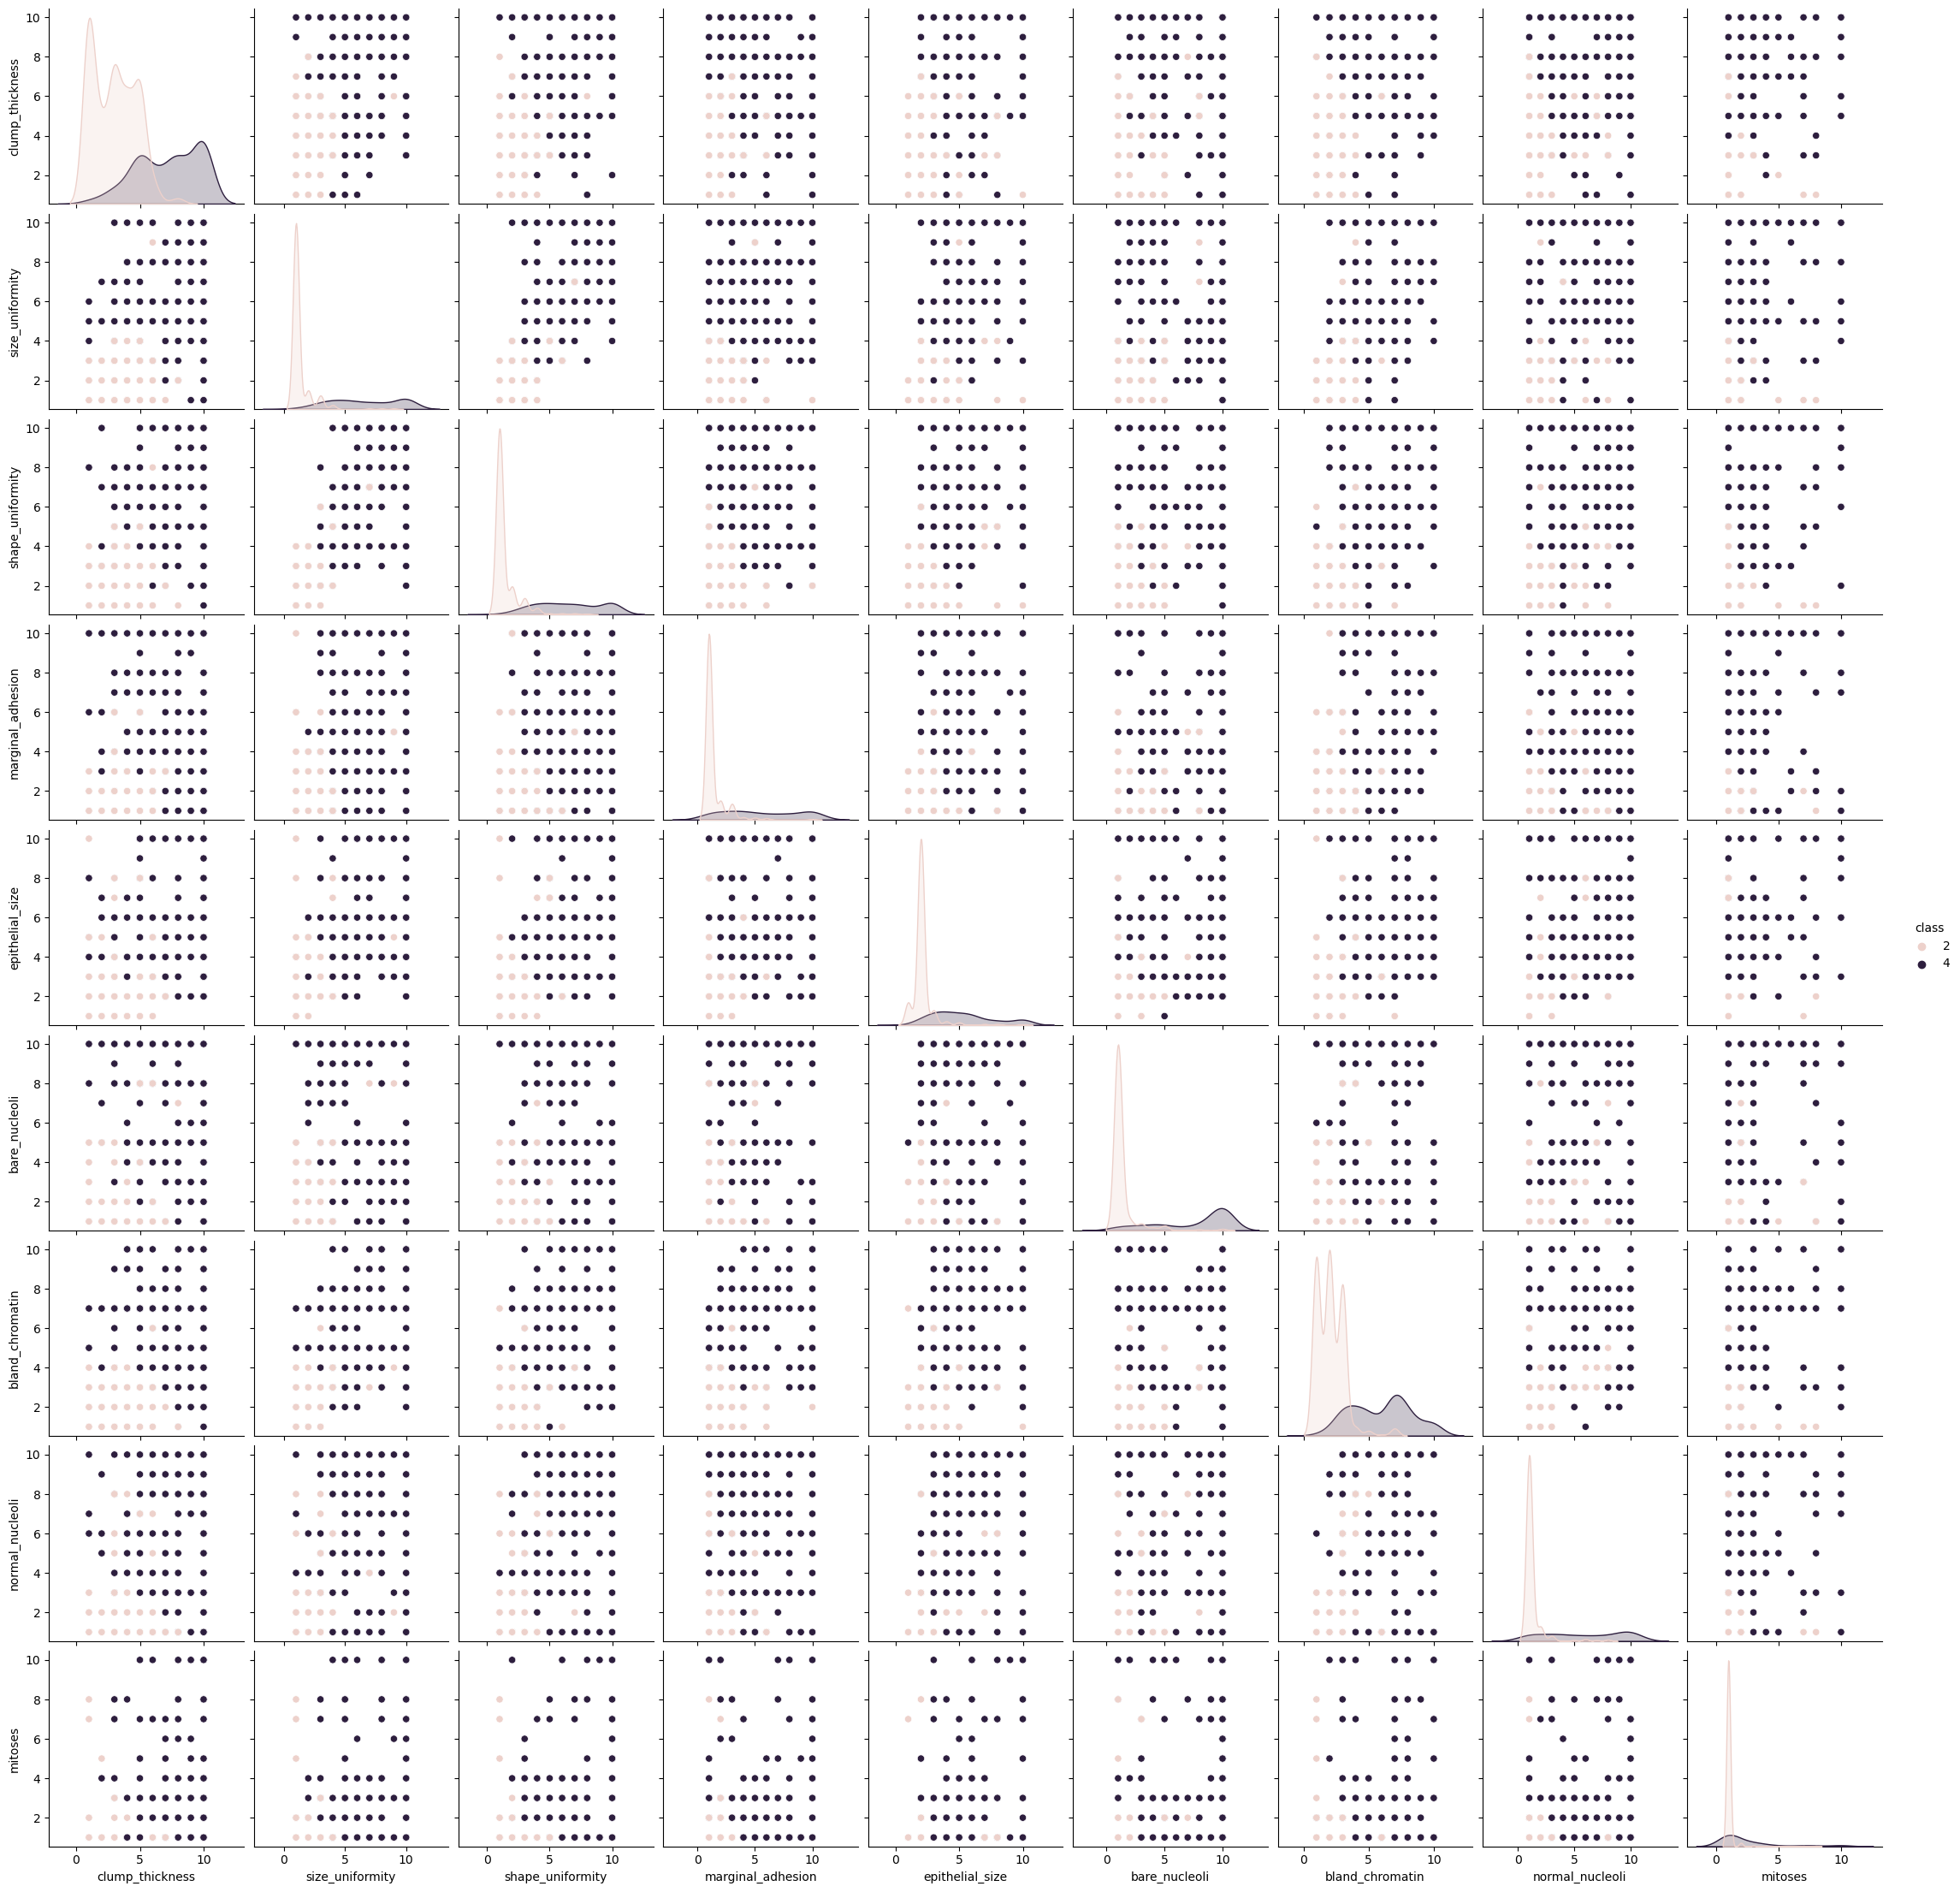

In [8]:
sns.pairplot(df.iloc[:,1:11], hue ='class')
plt.plot()
plt.show()

### <font color=darkblue><ins>Count Plots</ins></font>
Firstly, using the <a href="https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/" target="_top">value.counts()</a> method, I calculated the exact number of benign (2) and malignant (4) instances in the dataframe. 

In [9]:
benign = (df['class'].value_counts()[2])
print(benign)

444


In [10]:
malignant = (df['class'].value_counts()[4])
print(malignant)

239


Using the <a href="https://seaborn.pydata.org/generated/seaborn.countplot.html" target="_top">sns.countplot()</a> function, it is possible to visually plot the data under any of the attributes.

Below, using **Fig 1.** to visually demonstrate, the plot clearly shows that out of the 683 instances, the majority of the instances were benign with about 445 instances and the remaining cases were malignant. 

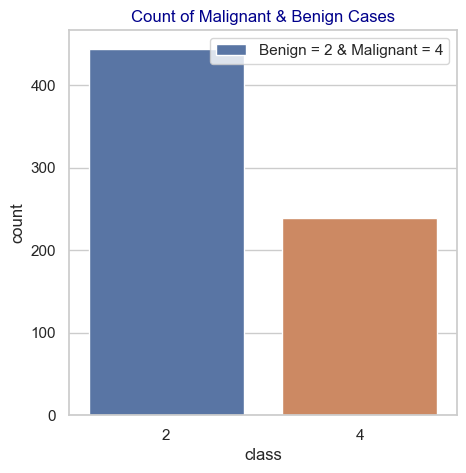

In [25]:
# Plotting the data
sns.set(style = 'whitegrid')
plt.figure(figsize=(5,5))
sns.countplot(x='class', data=df, label= 'Benign = 2 & Malignant = 4')
plt.title('Count of Malignant & Benign Cases', color = 'darkblue')
plt.legend()
plt.show()

I also looked at the occurences of values (between 1 and 10) of all of the input attributes on **Figs 1 to 9** below. These give a visual representation of the occurences of each of the values of each of the input values. They show that with the exception of *Epithelial Size* and *Bland Chromatin* the rest of the variables most common value was 1. The *Mitoses* plot tells us that there were no values of *9* for that variable. 

Using the ``subplot()`` function <a href="https://www.w3schools.com/python/matplotlib_subplot.asp" target="_top">W3schools. (2023)</a>, I have plotted three plots side by side in three seperate. I have run this code in three seperate cells so that all 9 of the plots are legible and can be analysied clearly. I have also used code from <a href="https://stackoverflow.com/a/71764226" target="_top">Stackoverflow (2022)</a>, to bypass error ``Type error: 'str' object is not callable``.


In [12]:
from importlib import reload #To remove Type error: 'str' object is not callable 
plt=reload(plt)

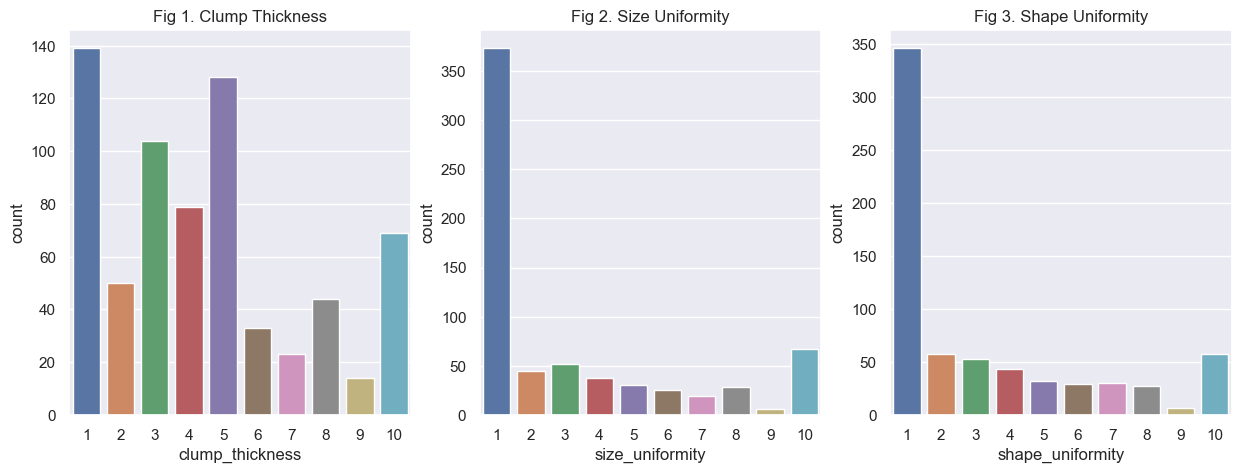

In [37]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x='clump_thickness', data=df)
plt.title("Fig 1. Clump Thickness")

plt.subplot(1,3,2)
sns.countplot(x='size_uniformity', data=df)
plt.title("Fig 2. Size Uniformity")

plt.subplot(1,3,3)
sns.countplot(x='shape_uniformity', data=df)
plt.title("Fig 3. Shape Uniformity")

plt.show()

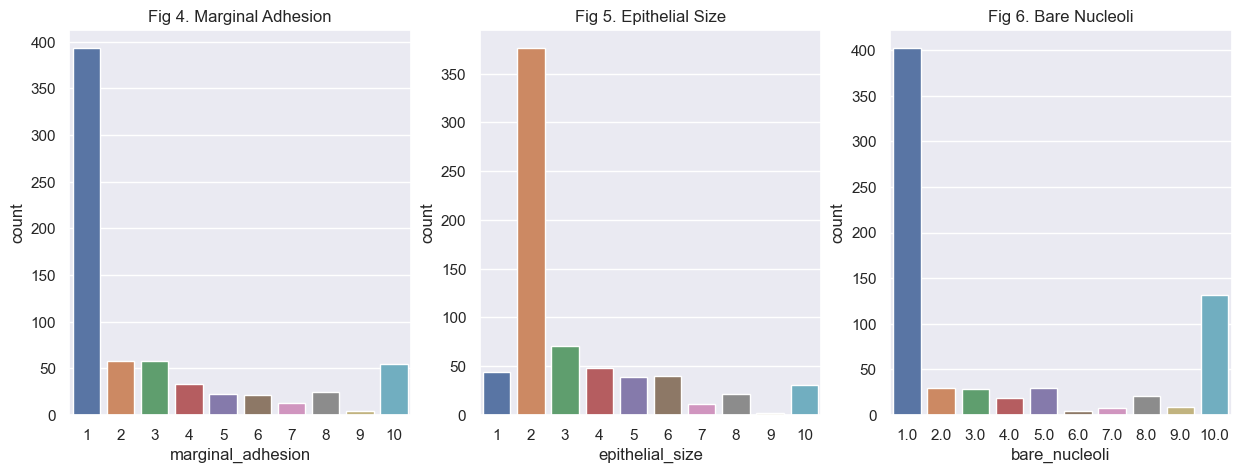

In [14]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x='marginal_adhesion', data=df)
plt.title("Fig 4. Marginal Adhesion")

plt.subplot(1,3,2)
sns.countplot(x='epithelial_size', data=df)
plt.title("Fig 5. Epithelial Size")

plt.subplot(1,3,3)
sns.countplot(x='bare_nucleoli', data=df)
plt.title("Fig 6. Bare Nucleoli")

plt.show()

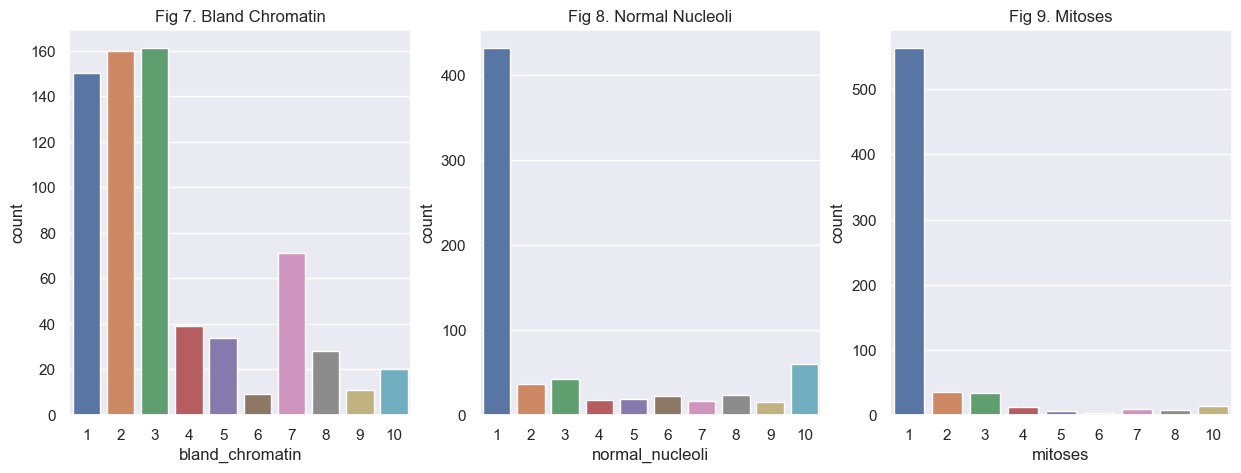

In [15]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x='bland_chromatin', data=df)
plt.title("Fig 7. Bland Chromatin")

plt.subplot(1,3,2)
sns.countplot(x='normal_nucleoli', data=df)
plt.title("Fig 8. Normal Nucleoli")

plt.subplot(1,3,3)
sns.countplot(x='mitoses', data=df)
plt.title("Fig 9. Mitoses")

plt.show()

To delve into this further using the ``hue`` parameter, **Figs 10 to 18** below demonstrate the relationship between the values for the 9 different input features and the outcome of the *class* feature. 

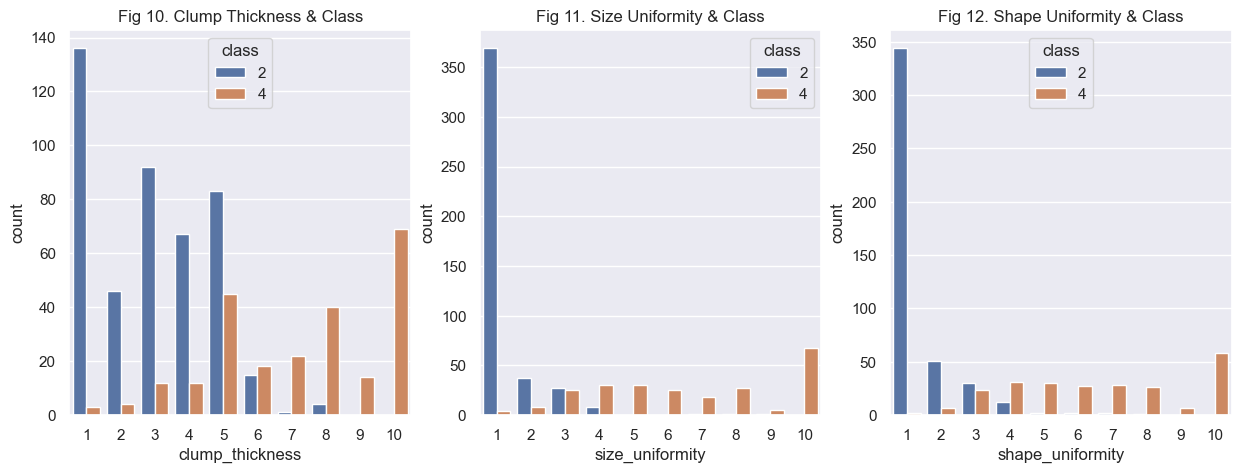

In [16]:
# Plotting 
sns.set(style = 'darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x='clump_thickness', hue ='class', data=df)
plt.title("Fig 10. Clump Thickness & Class")

plt.subplot(1,3,2)
sns.countplot(x='size_uniformity', hue ='class', data=df)
plt.title("Fig 11. Size Uniformity & Class")

plt.subplot(1,3,3)
sns.countplot(x='shape_uniformity', hue ='class', data=df)
plt.title("Fig 12. Shape Uniformity & Class")

plt.show()

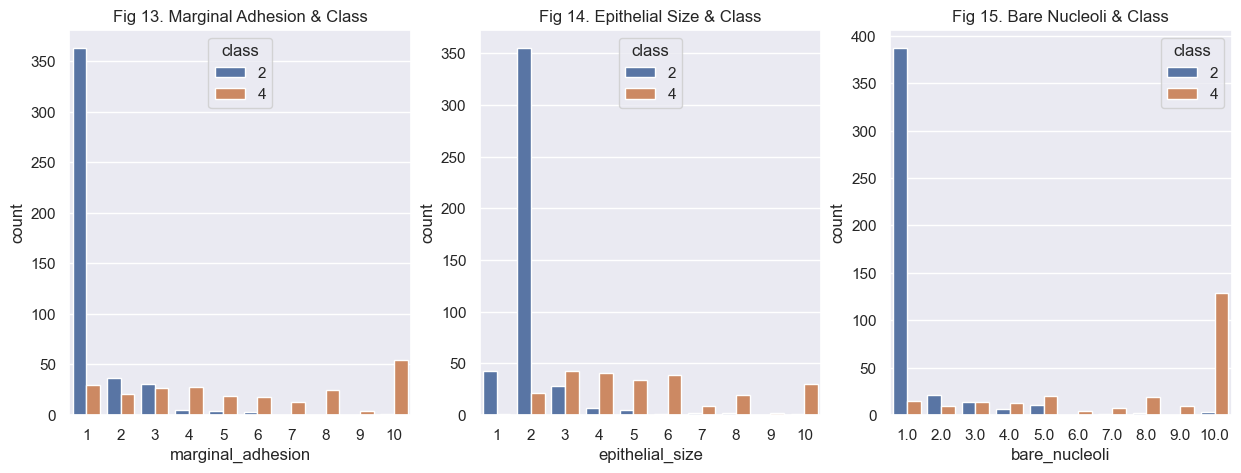

In [17]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x='marginal_adhesion', hue ='class', data=df)
plt.title("Fig 13. Marginal Adhesion & Class")

plt.subplot(1,3,2)
sns.countplot(x='epithelial_size', hue ='class', data=df)
plt.title("Fig 14. Epithelial Size & Class")

plt.subplot(1,3,3)
sns.countplot(x='bare_nucleoli', hue ='class', data=df)
plt.title("Fig 15. Bare Nucleoli & Class")

plt.show()

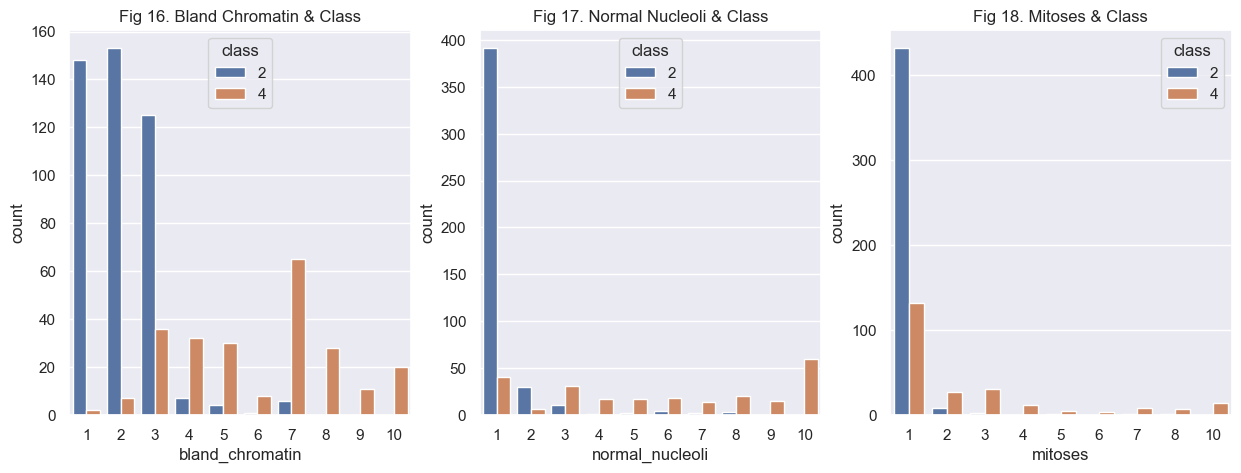

In [18]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x='bland_chromatin', hue ='class', data=df)
plt.title("Fig 16. Bland Chromatin & Class")

plt.subplot(1,3,2)
sns.countplot(x='normal_nucleoli', hue ='class', data=df)
plt.title("Fig 17. Normal Nucleoli & Class")

plt.subplot(1,3,3)
sns.countplot(x='mitoses', hue ='class', data=df)
plt.title("Fig 18. Mitoses & Class")

plt.show()

To take some examples to demonstrate how the two sets of plots work:

#### <ins>Example 1:</ins>

Looking at the variable **Clump Thickness**, **Fig 1** shows that there are about 139 instances where this feature has a value of 1. Looking at the  corresponding plot **Fig 10 Clump Thickness & Class** of these 139 instances of value 1, about 134 of the cases were benign and about 5 were malignant. 

For the same two plots, **Plot 1** shows that  value of 10 was recorded for about 70 cases. **Plot 10** then shows that all of these 70 cases turned out to be malignant.  

#### <ins>Example 2:</ins>
To look at another variable **Mitoses**, interestingly, **Plot 9** shows that the majority of the cases (about 550 cases) had a low value of 1. **Plot 18** however shows while the majority of these cases were in fact benign (about 425) there were quite a significant number of malignant cases (about 125 cases).

### <font color=darkblue><ins>Lineplots</ins></font>

The <a href="https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot" target="_top">sns.lineplot()</a> function, is another plotting function that can be used to visually demonstrate the relationship between variables. For example, using the lineplot below clearly demonstrates a strong linear relationship between all of the input variables and the output variable.

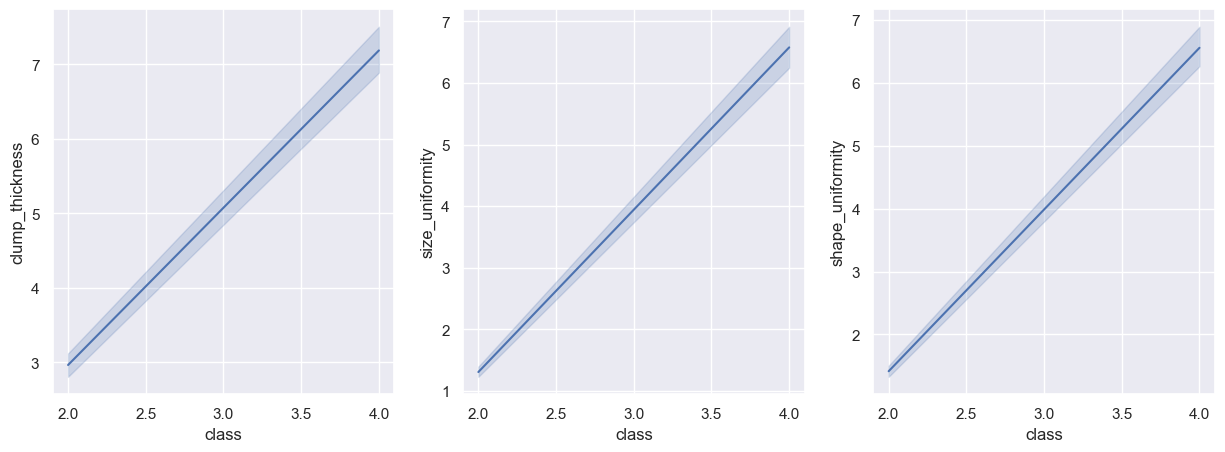

In [57]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.lineplot(x ="class", y = 'clump_thickness', data = df)


plt.subplot(1,3,2)
sns.lineplot(x ="class", y = 'size_uniformity', data = df)


plt.subplot(1,3,3)
sns.lineplot(x ="class", y = 'shape_uniformity', data = df)


plt.show()

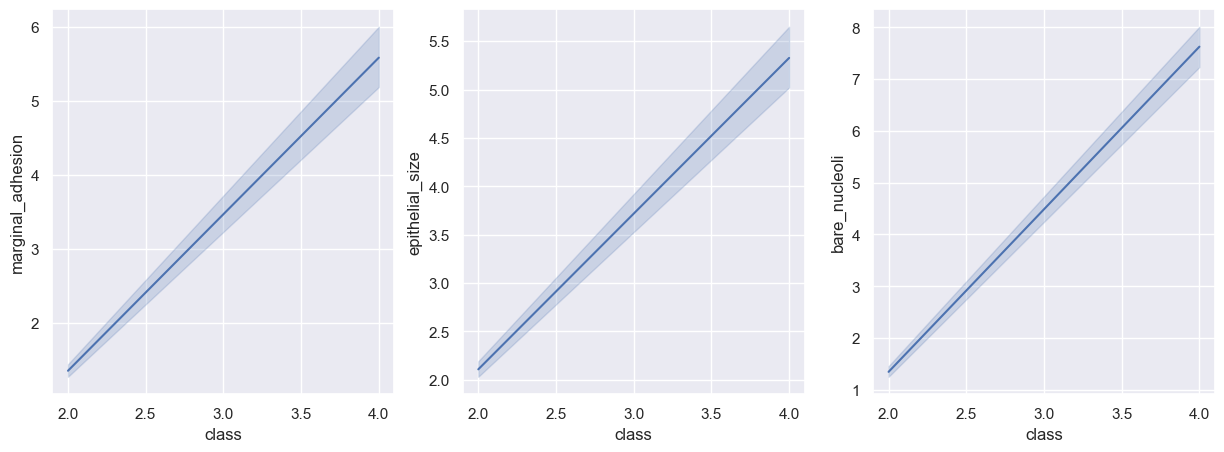

In [58]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.lineplot(x ="class", y = 'marginal_adhesion', data = df)


plt.subplot(1,3,2)
sns.lineplot(x ="class", y = 'epithelial_size', data = df)


plt.subplot(1,3,3)
sns.lineplot(x ="class", y = 'bare_nucleoli', data = df)


plt.show()

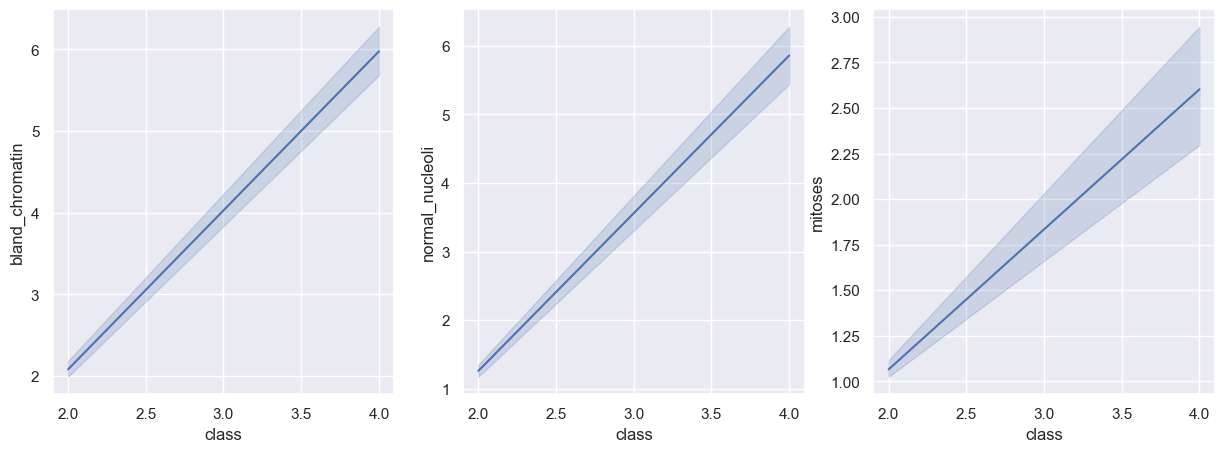

In [59]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.lineplot(x ="class", y = 'bland_chromatin', data = df)


plt.subplot(1,3,2)
sns.lineplot(x ="class", y = 'normal_nucleoli', data = df)


plt.subplot(1,3,3)
sns.lineplot(x ="class", y = 'mitoses', data = df)


plt.show()

### <font color=darkblue><ins>Heat Maps</ins></font>

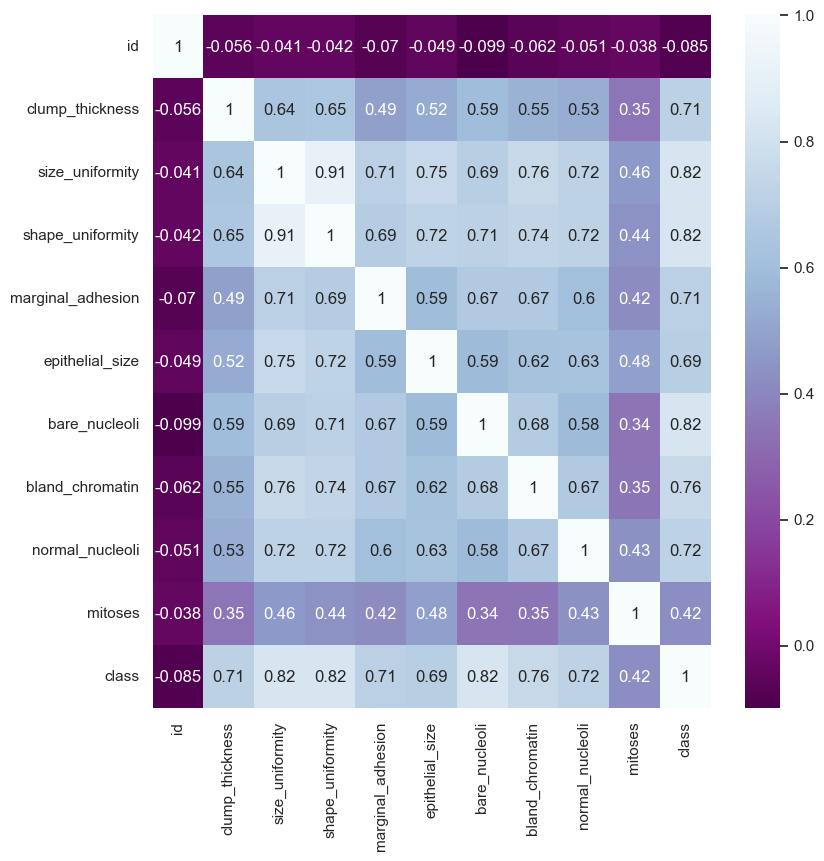

In [41]:
# Plotting correlation heatmap
# Changing the size of the heatmap 
sns.set(rc={"figure.figsize":(9, 9)})
# Creating the correlation heatmap 
dataplot = sns.heatmap(df.corr(), cmap="BuPu_r", annot=True) 
plt.show()

### <font color=darkblue><ins>Regression Analysis</ins></font>
Using <a href="https://www.w3schools.com/python/python_ml_multiple_regression.asp" target="_top">multiple regression analysis</a>, the predicted values for variable **y** can be calculated by inputting values for variables **x**. Below, is an example where the predicted value of 

In [21]:
x = df[['clump_thickness', 'size_uniformity', 'shape_uniformity','marginal_adhesion','epithelial_size', 
        'bare_nucleoli', 'bland_chromatin', 'normal_nucleoli']]
y = df['mitoses'] #the attribute that I am predicting the value of, using the regression analysis

regr = linear_model.LinearRegression() 
regr.fit(x.values, y) #run regression on given attributes (x) and output y


predictedClass = np.round(regr.predict([[1,7,6,2,9,10,3,5]]),0)
predictedClass

print("The predicted value for mitoses is{}" .format (predictedClass))

The predicted value for mitoses is[3.]


### <font color=darkblue><ins>Works in progress</ins></font>

In [22]:
from scipy.stats import linregress
linregress(df.shape_uniformity, df.size_uniformity)

LinregressResult(slope=0.9304703874627448, intercept=0.1591318142486271, rvalue=0.9072282331914423, pvalue=2.5677420515985884e-258, stderr=0.016531858919387785, intercept_stderr=0.07254495884655754)

## <font color=darkblue>References</font>
***

1. Heaton J. Github. breast-cancer-wisconsin.csv (2013) https://github.com/jeffheaton/aifh/blob/master/vol1/python-examples/datasets/breast-cancer-wisconsin.csv


2. Pandas Documentation. (2022). https://pandas.pydata.org/docs/


30. UCI Machine Learning Repository. Breast Cancer Wisconsin (Original) Data Set. https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)


31. Kumar. A. Data Analytics. Python – Replace Missing Values with Mean, Median & Mode. (2021). https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


32. Grace-Martin. K. the analysis factor. missing data: two big problems with mean imputation (2022). https://www.theanalysisfactor.com/mean-imputation/



4. ODDS. Breast Cancer Wisconsin (Original) dataset. (2022). http://odds.cs.stonybrook.edu/breast-cancer-wisconsin-original-dataset/


5. Ahmed. T, Omtiaz. N and Karmakar. A.(2020). Analysis of Wisconsin Breast Cancer original dataset using data mining and machine learning algorithms for breast cancer prediction
https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf


6. Wolberg, W. H. (1992) Breast Cancer Wisconsin (Original) Data Set. https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)


7. How to align table in Jupyter Notebook. Deepsim Acadamey. (2021). https://www.youtube.com/watch?v=_1jg0FlzpUs


8. scikit-learn. (2022). https://scikit-learn.org/stable/



9. Indeed Editorial Team. Machine Learning Classifiers: Definition and 5 Types. (2022). https://www.indeed.com/career-advice/career-development/classifiers-in-machine-learning


10. Manoli. N.S & Padma. S.K. Study and Analysis of Breast Cancer Data (2017) https://www.ijert.org/research/study-and-analysis-of-breast-cancer-data-IJERTCONV5IS21015.pdf


11. Wikipedia. Principal component analysis. (2022). https://en.wikipedia.org/wiki/Principal_component_analysis


12. Vadapalli. P. (2020). PCA in Machine Learning: Assumptions, Steps to Apply & Applications. https://www.upgrad.com/blog/pca-in-machine-learning/


13. Banoula. M. Understanding Naive Bayes Classifier. (2022). https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier#:~:text=how%20it%20works.-,Understanding%20Naive%20Bayes%20Classifier,event%20A%20given%20event%20B.


14. Saxena. S. Beginner’s Guide to Support Vector Machine(SVM) (2021). https://www.analyticsvidhya.com/blog/2021/03/beginners-guide-to-support-vector-machine-svm/#:~:text=A%20hyperplane%20is%20a%20decision,input%20features%20in%20the%20dataset.



15. Pupale. R. Support Vector Machines(SVM) — An Overview(2018) https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989


16. Ahmed.T. et al. (2020). Analysis of Wisconsin Breast Cancer original dataset using data mining and machine learning algorithms for breast cancer prediction. https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf


17. Educative, Inc. What is a multi-layered perceptron?. (2022). https://www.educative.io/answers/what-is-a-multi-layered-perceptron


18. Khanna.N. J48 Classification (C4.5 Algorithm) in a Nutshell. https://medium.com/@nilimakhanna1/j48-classification-c4-5-algorithm-in-a-nutshell-24c50d20658e


19. G. Salama et al. (2012). Experimental Comparison of Classifiers for Breast Cancer Diagnosis. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6408508 , https://www.semanticscholar.org/paper/Experimental-comparison-of-classifiers-for-breast-Salama-Abdelhalim/1437a72d1445abed6ae51020d0d041c63ef57bf3


20. Arach. S,  Bouden. H (2019). Performance Analysis on Three Breast Cancer Datasets using Ensemble Classifiers Techniques http://ijmcs.future-in-tech.net/14.4/R-Arach.pdf


21. Wikipedia. Random forest (2022). https://en.wikipedia.org/wiki/Random_forest



22. Zacharski. R. Training Sets, Test Sets, and 10-fold Cross-validation. (2022). https://www.kdnuggets.com/2018/01/training-test-sets-cross-validation.html


23. The scikit-yb developers. Recursive Feature Elimination. (2019). https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html


24. Al-Joda. A.A, et al. (2021). Comparison of classification techniques based on medical datasets. https://ijnaa.semnan.ac.ir/article_5965_a1ca78998e8760f2915afc8b1d037e64.pdf


25. Brownlee. J. Boosting and AdaBoost for Machine Learning. (2016). https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/


26. Abdulkareema S.A and Abdulkareem Z.O.(2021). An Evaluation of the Wisconsin Breast Cancer Dataset using Ensemble Classifiers and RFE Feature Selection Technique file:///C:/Users/Admin/Downloads/monther,+12300-Article+Text-36825-1-6-20210211%20(1).pdf


27. Bhandari. A. Analytics Vidhya. Everything you Should Know about Confusion Matrix for Machine Learning. (2022). https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/


28. M. Amrane, S. Oukid, I. Gagaoua and T. Ensarİ, "Breast cancer classification using machine learning," 2018 Electric Electronics, Computer Science, Biomedical Engineerings' Meeting (EBBT), 2018, pp. 1-4, doi: 10.1109/EBBT.2018.8391453. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8391453


29. Wikipedia. Euclidean distance. (2022). https://en.wikipedia.org/wiki/Euclidean_distance




### <font color=darkblue>Statistical Analysis of the Dataset</font>

pandas. pandas.DataFrame.describe. (2022). https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html


pandas. pandas.DataFrame.shape. (2022). https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html


seaborn.pydata. seaborn.pairplot. (2022). https://seaborn.pydata.org/generated/seaborn.pairplot.html


pandas. pandas.DataFrame.iloc (2022). https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html


geeksforgeeks. How to Count Occurrences of Specific Value in Pandas Column? (2021). https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/


seaborn. seaborn.countplot(). 2022. https://seaborn.pydata.org/generated/seaborn.countplot.html


W3schools. (2023). Matplotlib Subplot. https://www.w3schools.com/python/matplotlib_subplot.asp


Stackoverflow. (2022). Matplotlib pyplot.title(string) returns error. https://stackoverflow.com/a/71764226


seaborn. seaborn.lineplot(). (2022). https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
